In [16]:
using Plots, LinearAlgebra

In [129]:
include("./src/twoStageQR.ji")

var = 0.2
eta = 0.
q = 0.5
nTrain = 450
nTest = 50
dSamples = 3
d_zeros = 2
d = dSamples + d_zeros
err_type = "g"
trainData = additiveQR.data(nTrain, dSamples, d_zeros, var, eta, err_type)
testData = additiveQR.data(nTest, dSamples, d_zeros, var, eta, err_type)	
y = testData.y
knots = [-4, -2, -1, 0, 1, 2, 4.0]/2
# knots = [-3, -2, -1, 0, 1, 2, 3.0]/2

pbs, nbs = 2, 4x
elems = additiveQR.bsplElems(knots, pbs)
model = additiveQR.model(elems, trainData, q)
yp1 = additiveQR.predictor(model, testData.X)
norm(y - yp1)


13.31123504095175

In [130]:
lambda = ones(d) .* d
yp2 = additiveQR.predictor(model, testData.X, lambda, 2)
scatter(y)
scatter!(yp1)
scatter!(yp2)

50-element Vector{Float64}:
 -0.11271589375851893
 -1.5102707932165471
 -1.4719549315870861
 -1.662333529424274
 -1.3530133453273903
 -0.3646801816584949
 -0.2897042776973875
 -0.9945085520815085
 -0.27278232920687684
 -1.2716165200102054
 -0.28523526193642973
 -0.0020663014423184557
 -1.3621877806024845
  ⋮
 -1.8403739895939586
 -1.8188014974431534
 -1.4999766378871158
 -0.9506220288508475
 -1.695216093553932
 -0.18069592286645822
 -0.5488659892059666
 -1.2111182902040472
 -1.5490628532953563
 -1.423205826436064
 -1.7271860593291117
 -0.9561558443971984

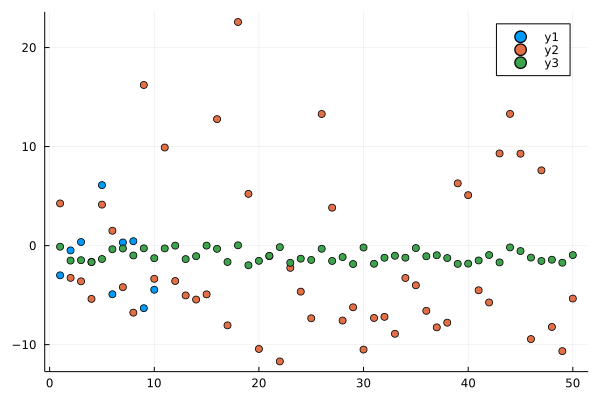

In [136]:
using QuantReg

In [139]:
x = randn(10)
y = x * 3 .- 2 + randn(10)/2
df = DataFrame([y x])

,x1,x2
,Float64,Float64
1,-3.0,-0.196314
2,-0.482902,0.636502
3,0.364089,0.713561
4,-1.64629,0.0360898
5,6.10967,2.58652
6,-4.91291,-0.943327
7,0.319786,0.643433
8,0.445627,0.727251
9,-6.32021,-1.3001


In [143]:
include("src/localLinear_quantReg.ji")
localLinear_quantReg.qr_solver(df, :x1, [:x2], 0.5)

2-element Vector{Float64}:
 -1.9672037248717806
  3.1226798859446783